<a href="https://colab.research.google.com/github/DesaData/DesaData/blob/main/London_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
3Import Libraries#
import pandas as pd
import numpy as np


In [72]:
df = pd.read_csv('london.csv')

In [107]:
df.head(9)

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag,Price
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1,True
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,1,True
2,1995-03-01,city of london,79121,E09000001,14.0,NaN,1,True
3,1995-04-01,city of london,77101,E09000001,7.0,NaN,1,False
4,1995-05-01,city of london,84409,E09000001,10.0,NaN,1,True
5,1995-06-01,city of london,94901,E09000001,17.0,NaN,1,True
6,1995-07-01,city of london,110128,E09000001,13.0,NaN,1,True
7,1995-08-01,city of london,112329,E09000001,14.0,NaN,1,True
8,1995-09-01,city of london,104473,E09000001,17.0,NaN,1,True


In [74]:
#Select our Features#
features = ['average_price', 'houses_sold', 'borough_flag']
data = features.copy()
data

['average_price', 'houses_sold', 'borough_flag']

<Axes: >

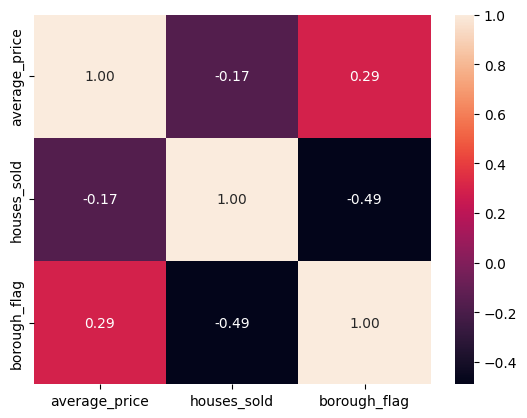

In [75]:
#Run Pearson correlation#
import seaborn as sns
sns.heatmap(df[data].corr(method='pearson'), annot=True, fmt='.2f')

In [76]:
df.shape

(13549, 7)

In [77]:
#Check for empty dataset#
df.isnull().sum()

,0
date,0
area,0
average_price,0
code,0
houses_sold,94
no_of_crimes,6110
borough_flag,0


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13549 entries, 0 to 13548
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           13549 non-null  object 
 1   area           13549 non-null  object 
 2   average_price  13549 non-null  int64  
 3   code           13549 non-null  object 
 4   houses_sold    13455 non-null  float64
 5   no_of_crimes   7439 non-null   float64
 6   borough_flag   13549 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 741.1+ KB


In [79]:
df['area'].nunique()

45

In [80]:
df[data].describe()

,average_price,houses_sold,borough_flag
count,1.354900e+04,13455.000000,13549.000000
mean,2.635197e+05,3893.994129,0.733338
std,1.876175e+05,12114.402476,0.442230
min,4.072200e+04,2.000000,0.000000
25%,1.323800e+05,247.000000,0.000000
50%,2.229190e+05,371.000000,1.000000
75%,3.368430e+05,3146.000000,1.000000
max,1.463378e+06,132163.000000,1.000000


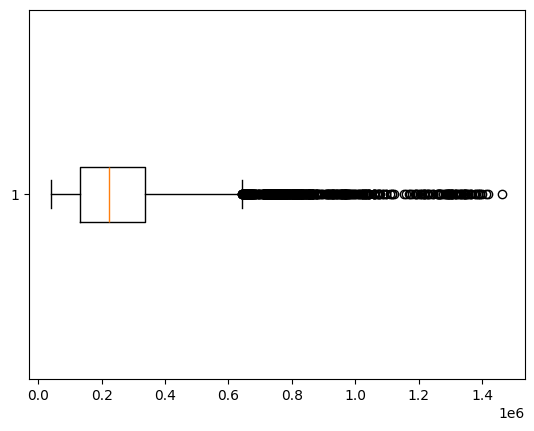

In [81]:
import matplotlib.pyplot as plt
plt.boxplot(df['average_price'], vert= False)
plt.show()

In [82]:
low, high = df['average_price'].quantile([0.1, 0.9])
df['Price'] = df['average_price'].between(low, high)

In [83]:
df['Price'].describe()

,Price
count,13549
unique,2
top,True
freq,10839


In [85]:
X = df[['borough_flag', 'no_of_crimes']]
y =df['Price']

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline

In [91]:
y_mean = y_train.mean()
y_pred_baseline = [y_mean] * len(y_train)
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)
r2_baseline = r2_score(y_train, y_pred_baseline)
rmse_baseline = np.sqrt(mean_squared_error(y_train, y_pred_baseline))
print('MAE Baseline:', round(mae_baseline, 2))
print('r2_baseline:', round(r2_baseline, 2))
print('rmse_baseline:', round(rmse_baseline, 2))

MAE Baseline: 0.32
r2_baseline: 0.0
rmse_baseline: 0.4


In [93]:
#Build Model#
imputer = SimpleImputer()
imputer.fit(X_train)

SimpleImputer()

In [94]:
X_train = imputer.transform(X_train) #Imputer is ths transformer that clears missing values#

In [98]:
model = make_pipeline(   #SimpleImputer-Transformer, Predictor-linearRegression#
    SimpleImputer(),
    LinearRegression()
)

In [99]:
model.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('linearregression', LinearRegression())])

In [100]:
#Train Our Data#
y_pred_train = model.predict(X_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
print('MAE train:', round(mae_train, 2))
print('r2_train:', round(r2_train, 2))
print('rmse_train:', round(rmse_train, 2))

MAE train: 0.32
r2_train: 0.01
rmse_train: 0.4


In [102]:
#Test our Data#
y_pred_test = model.predict(X_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print('MAE test:', round(mae_test, 2))
print('r2_test:', round(r2_test, 2))
print('rmse_test:', round(rmse_test, 2))

MAE test: 0.32
r2_test: 0.01
rmse_test: 0.4


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(


In [109]:
#Application of our Model#
def make_predictions(borough_flag, no_of_crimes):
  data={'borough_flag':borough_flag, 'no_of_crimes':no_of_crimes}

  df = pd.DataFrame(data, index=[0])
  data = model.predict(df).round(1)
  return f'Predicted Prices $ {data}'

In [110]:
make_predictions(1, 10)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(


'Predicted Prices $ [0.9]'